# ネットワーク分析

networkxまとめ  
https://qiita.com/hitsumabushi845/items/270d81c5c8017014df95  
https://qiita.com/kzm4269/items/081ff2fdb8a6b0a6112f

色々試したものは、`./old/network_analysis_test.ipynb`にあるのでそちらも参照

## 中心性について

ネットワーク上のノードの中で、どのノードが中心なのかを表す値  
ノードの大きさや色で中心性を表すことが多い

参考  
https://qiita.com/tomov3/items/64f7315474747fc01a6c  
https://qiita.com/Hiroyuki1993/items/ac3ad3029eba8d4b6eb6  
http://mitsuruya.hatenablog.com/entry/2014/10/24/200202  
http://yamaguchiyuto.hatenablog.com/entry/20130122/1358836165

### 次数中心性

エッジ（他のノードとのリンク）が多いほど中心性が高いとする計算方法  
最も単純な中心性だが、ソーシャルネットワークの分析などで使用される

`ノードiの次数中心性　＝　ノードiにつながっているエッジの数`

### 近接中心性

他のノードとの距離が近いほど中心性が高いとする計算方法  

`ノードiの近接中心性　＝　(ノードの数 - 1) / (他ノードとノードiの距離の総和)`

### 媒介中心性

その点を通る経路が多いほど、中心性が高いとする計算方法

`ノードiの媒介中心性 = ノードiを通る経路数の総和 / ノードiを除く点の組合せ数`

### 固有ベクトル中心性

自分に対してエッジを張っているノード（隣のノード）がどれだけの中心性を持っているのかを考慮した中心性  

`ノードiの固有ベクトル中心性 = iに対してエッジを張っているノードの中心性の合計値`

### カッツの中心性

固有ベクトル中心性の発展形

### PageRank

固有ベクトル中心性の発展形その2  
webページのネットワークなどに用いられる

ノードが持っている中心性をそのノードが張っているエッジの本数（出次数）で割ってからそれぞれに遷移させる

### Qiitaのタグでネットワーク図を作ってみる

参考  
https://qiita.com/inoory/items/088f719f2fd9a2ea4ee5

In [130]:
# ライブラリのimportまとめ
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import requests
import json
import collections
import itertools
import pprint

%matplotlib inline

In [131]:
# qiitaのページデータを取得
items = []
params = {"page":1, "per_page":100}
for i in range(60):
    print("fetching... page " + str(i+1))
    params["page"] = i + 1
    res = requests.get("https://qiita.com/api/v2/items", params=params)
    items.extend(json.loads(res.text))

fetching... page 1
fetching... page 2
fetching... page 3
fetching... page 4
fetching... page 5
fetching... page 6
fetching... page 7
fetching... page 8
fetching... page 9
fetching... page 10
fetching... page 11
fetching... page 12
fetching... page 13
fetching... page 14
fetching... page 15
fetching... page 16
fetching... page 17
fetching... page 18
fetching... page 19
fetching... page 20
fetching... page 21
fetching... page 22
fetching... page 23
fetching... page 24
fetching... page 25
fetching... page 26
fetching... page 27
fetching... page 28
fetching... page 29
fetching... page 30
fetching... page 31
fetching... page 32
fetching... page 33
fetching... page 34
fetching... page 35
fetching... page 36
fetching... page 37
fetching... page 38
fetching... page 39
fetching... page 40
fetching... page 41
fetching... page 42
fetching... page 43
fetching... page 44
fetching... page 45
fetching... page 46
fetching... page 47
fetching... page 48
fetching... page 49
fetching... page 50
fetching.

In [132]:
# 取得したデータからタグのみを抽出
tags_list = []
for item in items:
    tags = [tag["name"] for tag in item["tags"]]
    tags_list.append(tags)

tags_list

[['TypeScript', 'React', 'material-ui'],
 ['FirefoxOS'],
 ['Unity', '2D', 'ブロック崩し'],
 ['docker', 'webpack'],
 ['PostgreSQL'],
 ['FirefoxOS'],
 ['C++N4741'],
 ['iPhone', 'iOS', 'Unity', 'iPhoneX'],
 ['FirefoxOS'],
 ['chef', 'CentOS6.x'],
 ['Iterator'],
 ['FirefoxOS'],
 ['PostgreSQL', 'golang', 'create'],
 ['Android', 'iOS', 'Dart', 'Flutter'],
 ['FirefoxOS'],
 ['雑記', 'VisualStudio'],
 ['VBA', 'VBAマクロ'],
 ['PHP', 'laravel5.5'],
 ['find'],
 ['processing', 'drone'],
 ['rust'],
 ['Nortonantivirus', 'Nortontechsupport'],
 ['Node.js', 'promise'],
 ['coding', 'C++N4606'],
 ['Java', 'Bash', 'Mac'],
 ['GPU', 'Jupyter', 'TensorFlow', 'ibmcloud', 'nvidia-docker2'],
 ['初心者', 'Nim'],
 ['C++N4741'],
 ['PHP', 'MySQL', 'MDB2'],
 ['C++', '機械学習', '物理シミュレーション', 'ニューラルネットワーク', '実験'],
 ['APIGateway', 'Claudia.js'],
 ['RaspberryPi', 'raspbian'],
 ['JavaScript', 'PDF', 'jspdf'],
 ['Python', 'Athena'],
 ['laravel5.5', 'PhpSpreadsheet'],
 ['JavaScript', 'RxJS'],
 ['オシロスコープ'],
 ['C++N4741'],
 ['GoogleAnalytics',

In [133]:
# 各タグの出現回数を数える（ノードの大きさや色に使用）
tag_count = collections.Counter(itertools.chain.from_iterable(tags_list)).most_common(50)
tag_count

[('Python', 468),
 ('JavaScript', 359),
 ('Ruby', 221),
 ('PHP', 210),
 ('AWS', 175),
 ('Java', 166),
 ('Linux', 161),
 ('python3', 158),
 ('Rails', 152),
 ('Unity', 150),
 ('C#', 150),
 ('iOS', 149),
 ('docker', 140),
 ('Swift', 138),
 ('Android', 134),
 ('Node.js', 131),
 ('coding', 112),
 ('Windows', 109),
 ('Git', 108),
 ('laravel', 101),
 ('初心者', 99),
 ('C++N4741', 94),
 ('Mac', 94),
 ('C++', 94),
 ('vue.js', 90),
 ('RaspberryPi', 87),
 ('MySQL', 86),
 ('RubyOnRails', 86),
 ('機械学習', 85),
 ('Ubuntu', 79),
 ('GitHub', 72),
 ('golang', 69),
 ('CSS', 69),
 ('Go', 66),
 ('React', 63),
 ('HTML', 63),
 ('Xcode', 62),
 ('Windows10', 60),
 ('DeepLearning', 59),
 ('C', 56),
 ('TensorFlow', 53),
 ('jQuery', 53),
 ('clang++', 50),
 ('TypeScript', 49),
 ('g++', 49),
 ('Kotlin', 49),
 ('Blockchain', 48),
 ('kubernetes', 47),
 ('Ethereum', 47),
 ('centos7', 43)]

In [134]:
# グラフデータの作成
# 今回は無向グラフ
# 有向グラフの場合はnx.Graph()のパラメータで指定する（はず）
G = nx.Graph()

# ノードの追加
G.add_nodes_from([(tag, {"count":count}) for tag,count in tag_count])

# エッジの追加
for tags in tags_list:
    for node0,node1 in itertools.combinations(tags, 2):
        if not G.has_node(node0) or not G.has_node(node1):
            continue
        if G.has_edge(node0, node1):
            G.edges[node0, node1]["weight"] += 1
        else:
            G.add_edge(node0, node1, weight=1)

In [135]:
# ノードの確認
#G.nodes(data=True) # これでも表示可
print("ノードの確認（上位5個のみ表示）")
pprint.pprint(sorted(dict(G.nodes).items(), key=lambda x: x[1]["count"], reverse=True)[:5])
print("\n")

# エッジの確認
print("エッジの確認")
print(G.edges())

ノードの確認（上位5個のみ表示）
[('Python', {'count': 468}),
 ('JavaScript', {'count': 359}),
 ('Ruby', {'count': 221}),
 ('PHP', {'count': 210}),
 ('AWS', {'count': 175})]


エッジの確認
[('Python', 'JavaScript'), ('Python', 'TensorFlow'), ('Python', '機械学習'), ('Python', 'python3'), ('Python', 'C++'), ('Python', 'RaspberryPi'), ('Python', 'vue.js'), ('Python', 'DeepLearning'), ('Python', 'GitHub'), ('Python', 'AWS'), ('Python', 'Unity'), ('Python', '初心者'), ('Python', 'MySQL'), ('Python', 'Ubuntu'), ('Python', 'HTML'), ('Python', 'Ruby'), ('Python', 'Git'), ('Python', 'docker'), ('Python', 'Java'), ('Python', 'C#'), ('Python', 'C'), ('Python', 'Linux'), ('Python', 'Xcode'), ('Python', 'Swift'), ('Python', 'Mac'), ('Python', 'Windows'), ('Python', 'Ethereum'), ('Python', 'Node.js'), ('Python', 'Windows10'), ('Python', 'PHP'), ('Python', 'centos7'), ('Python', 'Blockchain'), ('JavaScript', 'TensorFlow'), ('JavaScript', 'CSS'), ('JavaScript', 'Node.js'), ('JavaScript', 'vue.js'), ('JavaScript', 'Rails'), ('Jav

In [136]:
# ノードの次数
G.degree()

DegreeView({'Python': 32, 'JavaScript': 30, 'Ruby': 26, 'PHP': 25, 'AWS': 25, 'Java': 21, 'Linux': 26, 'python3': 13, 'Rails': 19, 'Unity': 13, 'C#': 17, 'iOS': 12, 'docker': 26, 'Swift': 9, 'Android': 14, 'Node.js': 15, 'coding': 5, 'Windows': 19, 'Git': 19, 'laravel': 16, '初心者': 30, 'C++N4741': 3, 'Mac': 22, 'C++': 14, 'vue.js': 17, 'RaspberryPi': 13, 'MySQL': 15, 'RubyOnRails': 15, '機械学習': 12, 'Ubuntu': 22, 'GitHub': 20, 'golang': 5, 'CSS': 10, 'Go': 8, 'React': 14, 'HTML': 15, 'Xcode': 7, 'Windows10': 16, 'DeepLearning': 10, 'C': 10, 'TensorFlow': 13, 'jQuery': 11, 'clang++': 4, 'TypeScript': 8, 'g++': 4, 'Kotlin': 9, 'Blockchain': 13, 'kubernetes': 9, 'Ethereum': 10, 'centos7': 9})

In [137]:
# 各中心性の計算
# 上位5個のみ表示

# 次数中心性
degree_centers = nx.degree_centrality(G)
print("次数中心性")
pprint.pprint(sorted(degree_centers.items(), key=lambda x: x[1], reverse=True)[:5])
print("\n")

# 近接中心性
close_centers = nx.closeness_centrality(G)
print("近接中心性")
pprint.pprint(sorted(close_centers.items(), key=lambda x: x[1], reverse=True)[:5])
print("\n")

# 媒介中心性
between_centers = nx.betweenness_centrality(G)
print("媒介中心性")
pprint.pprint(sorted(between_centers.items(), key=lambda x: x[1], reverse=True)[:5])
print("\n")

# 固有ベクトル中心性
eigen_centers = nx.eigenvector_centrality(G)
print("固有ベクトル中心性")
pprint.pprint(sorted(eigen_centers.items(), key=lambda x: x[1], reverse=True)[:5])
print("\n")

# 固有ベクトル中心性 (numpy版)
eigen_centers_np = nx.eigenvector_centrality_numpy(G)
print("固有ベクトル中心性（numpy版）")
pprint.pprint(sorted(eigen_centers_np.items(), key=lambda x: x[1], reverse=True)[:5])

次数中心性
[('Python', 0.6530612244897959),
 ('JavaScript', 0.6122448979591836),
 ('初心者', 0.6122448979591836),
 ('Ruby', 0.5306122448979591),
 ('Linux', 0.5306122448979591)]


近接中心性
[('Python', 0.7313432835820896),
 ('JavaScript', 0.7205882352941176),
 ('初心者', 0.7101449275362319),
 ('Linux', 0.6712328767123288),
 ('Ruby', 0.6533333333333333)]


媒介中心性
[('JavaScript', 0.10351845091422783),
 ('C++', 0.07791304485160634),
 ('初心者', 0.06237485592303746),
 ('Python', 0.06162070522911808),
 ('Java', 0.044738238405616686)]


固有ベクトル中心性
[('Python', 0.257634088127812),
 ('初心者', 0.2385915930532181),
 ('JavaScript', 0.23111608443534415),
 ('Ruby', 0.22047724820858816),
 ('docker', 0.22045895331412751)]


固有ベクトル中心性（numpy版）
[('Python', 0.2576341671892748),
 ('初心者', 0.23859112335643623),
 ('JavaScript', 0.23111529745650064),
 ('Ruby', 0.2204772401480056),
 ('docker', 0.22045956909075506)]


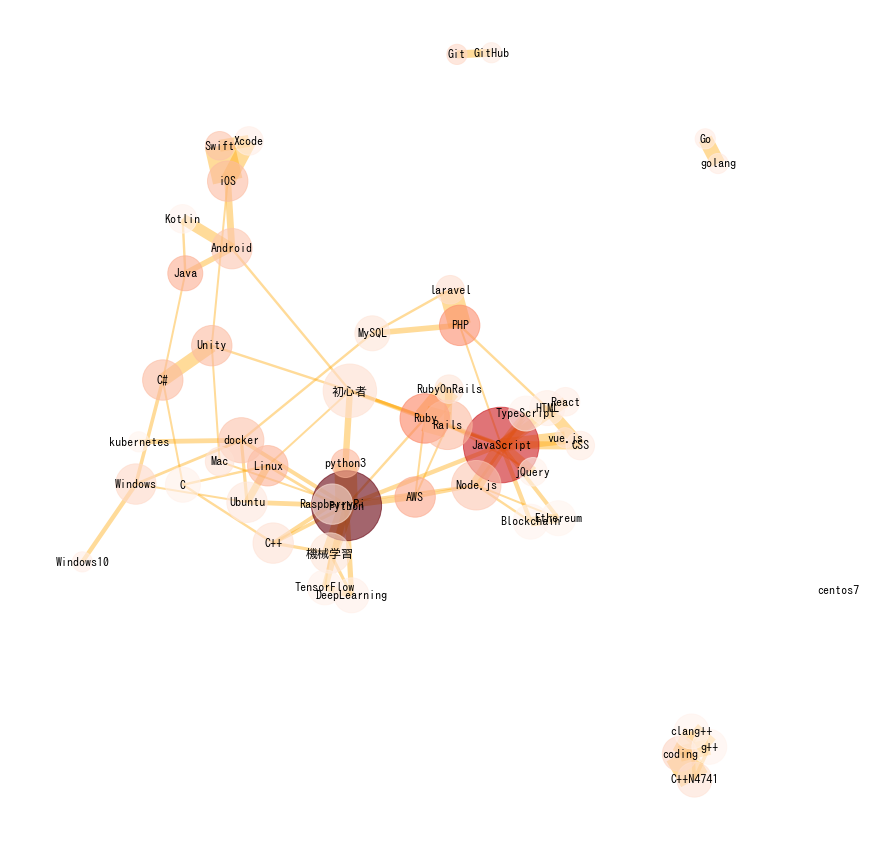

In [139]:
# 描画
# グラフ描画が毎回変わってしまうが、どこかでseed値を指定できるはず

# 中心性の計算
dc = nx.degree_centrality(G) # 次数中心性
cc = nx.closeness_centrality(G) # 近接中心性
bc = nx.betweenness_centrality(G) # 媒介中心性
ec = nx.eigenvector_centrality(G) # 固有ベクトル中心性
pr = nx.pagerank(G) # pagerank

# パラメータの設定
min_weight = 4 # 削除するweightの閾値
k_spring = 0.6 # プロットの形の係数（大きいほど円形に近づく）
use_centr = dc # どの中心性を使用するか

# プロットに用いる値のリスト（色設定やnode_sizeなどに使用）
centr_list = list(use_centr.values()) # 中心性の値のリスト
cnt_list = [ d['count'] for (n,d) in G.nodes(data=True)] # 出現数のリスト
weight_list = [ d['weight'] for (u,v,d) in G.edges(data=True)] # 重みのリスト

# サイズ
#node_size = list(map(lambda x: x*20, cnt_list)) # cnt_listからノードサイズを作成（↑と同じ）
node_size = list(map(lambda x: x*20000, centr_list)) # 中心性をノードサイズにする
edge_width = list(map(lambda x: x*0.4, weight_list)) # weight_listからエッジの幅を決定

# 色
#color_list = centr_list # 中心性を使用
#color_list = list(map(lambda x: 1-x, centr_list)) # lambda式で値を操作（この場合は順位を逆にする処理）
color_list = cnt_list # 出現数を使用

# プロットの形を調整（反発力の調整）
pos = nx.spring_layout(G, k=k_spring)

# weightが小さいedgeを削除
for (u,v,d) in list(G.edges(data=True)):
    if d["weight"] <= min_weight:
        G.remove_edge(u, v)

# プロット
plt.figure(figsize=(15,15))

# cmapはmatplotlibのcolormapで、色のつけ方を決めている
# alphaが何か要確認（document参照）
nx.draw_networkx_nodes(G, pos, node_color=color_list, cmap=plt.cm.Reds, alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="IPAGothic", font_weight="bold")
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='orange', width=edge_width)

plt.axis('off')
#plt.savefig("g2.png")
plt.show()

In [140]:
# コミュニティの検出
# 辺の媒介中心性などを使用した方がよいかも（もう少し調べる）
cliques = nx.find_cliques(G)
pprint.pprint([ c for c in cliques])

[['golang', 'Go'],
 ['RaspberryPi', 'Linux'],
 ['RaspberryPi', 'Node.js'],
 ['RaspberryPi', 'Python', 'C++'],
 ['RubyOnRails', 'Ruby', 'Rails'],
 ['Mac', 'Python'],
 ['Mac', 'Unity'],
 ['Ubuntu', 'Linux'],
 ['Ubuntu', 'docker', 'Python'],
 ['Ubuntu', 'docker', 'Windows'],
 ['Xcode', 'Swift', 'iOS'],
 ['Windows10', 'Windows'],
 ['DeepLearning', 'TensorFlow', 'Python', '機械学習'],
 ['JavaScript', 'React', 'TypeScript'],
 ['JavaScript', 'Blockchain', 'Ethereum', 'Node.js'],
 ['JavaScript', 'Rails', 'Ruby', '初心者'],
 ['JavaScript', 'Rails', 'jQuery'],
 ['JavaScript', 'TypeScript', 'Node.js'],
 ['JavaScript', 'CSS', 'HTML'],
 ['JavaScript', 'Python', 'Ruby'],
 ['JavaScript', 'HTML', 'PHP'],
 ['JavaScript', 'vue.js'],
 ['Unity', '初心者'],
 ['Unity', 'iOS'],
 ['Unity', 'C#'],
 ['C#', 'Java'],
 ['C#', 'C'],
 ['C#', 'Windows'],
 ['kubernetes', 'docker'],
 ['python3', '初心者'],
 ['python3', 'Python'],
 ['C++N4741', 'clang++', 'coding', 'g++'],
 ['centos7'],
 ['Java', 'Android', 'Kotlin'],
 ['MySQL', 'la